# Build Predictive Models to Predict Continuity of Union Membership

## Introduction:
 
**The tables contain following variables:**    
- **DS_ID:** member ID number  
- **gender:** member gender  
- **management:** if the member holds management position  
- **USACitizen:** if the member is a USA citizen  
- **Married:** if the member is married  
- **MonthsInUnion:** how many months the member has been a Union member  
- **ContinuingEd:** if the member is continuing education  
- **Feature A, B, C, D, E, F:** fictitious features  
- **Connectivity:** member's internet connectivity  
- **DuesFrequency:** union fees pay frequency  
- **PaperlessBill:** if the member receives paperless bill  
- **PaymentMethod:** method of union due payment  
- **MonthlyDue:** monthly membership due   
- **TotalDues:** total outstanding due  
- **LeftUnion:** still a union member; or no longer a member (only available in train DataFrame)    

**Analysis Flow:**
- **Part A: Set Up the Environment:**
- **Part B: Load the Data:**  
- **Part C: Explore the data:**  
- **Part D: Clean the Data:**  
- **Part E: Plot the data:**  
- **Part F: Data Standardization / Normalization:**  
- **Part G: PCA Analysis:**  
- **Part H: Build the Logistic Regression Model:**  
- **Part I: Build the Decision Tree:**  
- **Part J: Build the Random Forest model:**  
- **Part K: Build the Support Vector Machine (SVM):**  
- **Part L: Build the Neural Networks:**  
- **Part M: Identify the best predictive model and predict the label:**


## Part A: Set Up Environment:
#### Import the required tools for the analysis.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from random import random

## Part B: Load the Data:
#### Load the test and toPredict data (which is used to predict the target  variable "LeftUnion") from local drive.

In [2]:
folder = os.getcwd() + '/'
train_data = pd.read_csv(folder +'UDSU_train_Data.csv', sep=',', header = 0)
toPredict_data = pd.read_csv(folder +'UDSU_toPredict_data.csv', sep=',', header = 0)

## Part C: Explore the data:

#### Find the shape (rowsXcolumn) of the DataFrames.

In [3]:
print(train_data.shape)
print(toPredict_data.shape)

(999, 21)
(5000, 20)


#### Preview the first few rows of train DataFrame.

In [4]:
train_data.head()

,DS_ID,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,...,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
0,5000,Female,0,Yes,No,1,Yes,No,other,Maryville,...,Maryville,Maryville,Maryville,Maryville,Month-to-month,Yes,Mailed check,21,21,No
1,5001,Male,0,No,No,31,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,78,2435,Yes
2,5001,Male,0,Yes,Yes,13,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,No,Bank transfer (automatic),62,750,No
3,5002,Female,0,No,Yes,37,Yes,No,other,Maryville,...,Maryville,Maryville,Maryville,Maryville,One year,No,Bank transfer (automatic),20,755,No
4,5002,Female,0,No,No,11,Yes,Yes,other,Maryville,...,Maryville,Maryville,Maryville,Maryville,One year,No,Electronic check,25,245,No


#### Preview the first few rows of toPredict DataFrame.

In [5]:
toPredict_data.head()

,DS_ID,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues
0,10000,Male,0,Yes,No,1,No,Maryville,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,30,30
1,10001,Female,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,57,1890
2,10002,Female,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,54,108
3,10003,Female,0,No,No,45,No,Maryville,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42,1841
4,10004,Male,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,71,152


#### View the train and toPredict DataFrame in a bit more detail with info( ) function.

In [6]:
train_data.info(), toPredict_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   DS_ID             999 non-null    int64 
 1   gender            999 non-null    object
 2   Management        999 non-null    int64 
 3   USAcitizen        999 non-null    object
 4   Married           999 non-null    object
 5   MonthsInUnion     999 non-null    int64 
 6   ContinuingEd      999 non-null    object
 7   FeatureA          999 non-null    object
 8   Connectivity      999 non-null    object
 9   FeatureC          999 non-null    object
 10  FeatureD          999 non-null    object
 11  FeatureE          999 non-null    object
 12  FeatureF          999 non-null    object
 13  FeatureG          999 non-null    object
 14  FeatureB          999 non-null    object
 15  DuesFrequency     999 non-null    object
 16  PaperlessBilling  999 non-null    object
 17  PaymentMethod   

(None, None)

## Part D: Data Cleaning:
#### Clean the data to make it suitable for further analysis.

#### Check and display duplicate rows in train DataFrame, if any. As we be see below, there are no duplicate rows in test DataFrame.

In [7]:
# Check if there are any duplicate rows
duplicate_train_sum = train_data.duplicated().sum()

# Show the duplicate rows, if any
duplicate_train = train_data[train_data.duplicated(keep= False)]

print(duplicate_train_sum)
duplicate_train

0


,DS_ID,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,...,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion


#### Coerce any non-numeric values in numeric columns ("MonthlyDues", "TotalDues") in train and toPredict DataFrame to NaN.

In [8]:
train_data[["MonthlyDues", "TotalDues"]] = (train_data[["MonthlyDues", "TotalDues"]]
                                                .apply(pd.to_numeric, errors = 'coerce'))

toPredict_data[["MonthlyDues", "TotalDues"]] = (toPredict_data[["MonthlyDues", "TotalDues"]]
                                                .apply(pd.to_numeric, errors = 'coerce'))

#### Check and count any missing values in each of the columns of train and toPredict DataFrame.

In [9]:
train_data.isnull().sum()

DS_ID               0
gender              0
Management          0
USAcitizen          0
Married             0
MonthsInUnion       0
ContinuingEd        0
FeatureA            0
Connectivity        0
FeatureC            0
FeatureD            0
FeatureE            0
FeatureF            0
FeatureG            0
FeatureB            0
DuesFrequency       0
PaperlessBilling    0
PaymentMethod       0
MonthlyDues         0
TotalDues           1
LeftUnion           0
dtype: int64

In [10]:
toPredict_data.isnull().sum()

DS_ID               0
gender              0
Management          0
USAcitizen          0
Married             0
MonthsInUnion       0
ContinuingEd        0
FeatureA            0
Connectivity        0
FeatureC            0
FeatureD            0
FeatureE            0
FeatureF            0
FeatureG            0
FeatureB            0
DuesFrequency       0
PaperlessBilling    0
PaymentMethod       0
MonthlyDues         0
TotalDues           8
dtype: int64

#### As there are not many NaN and missing values in the train and toPredict DataFrame, we will remove all of the rows with NaN and missing values from the DataFrames. Check the new DataFrame structure to confirm the removal.

In [11]:
toPredict_data = toPredict_data.dropna(axis = 0, inplace = False)
train_data = train_data.dropna(axis = 0, inplace = False)

print(train_data.shape)
print(toPredict_data.shape)

(998, 21)
(4992, 20)


#### Check the data types of the variables (columns) in train and toPredict DataFrame.

In [12]:
train_data.dtypes, toPredict_data.dtypes

(DS_ID                 int64
 gender               object
 Management            int64
 USAcitizen           object
 Married              object
 MonthsInUnion         int64
 ContinuingEd         object
 FeatureA             object
 Connectivity         object
 FeatureC             object
 FeatureD             object
 FeatureE             object
 FeatureF             object
 FeatureG             object
 FeatureB             object
 DuesFrequency        object
 PaperlessBilling     object
 PaymentMethod        object
 MonthlyDues           int64
 TotalDues           float64
 LeftUnion            object
 dtype: object,
 DS_ID                 int64
 gender               object
 Management            int64
 USAcitizen           object
 Married              object
 MonthsInUnion         int64
 ContinuingEd         object
 FeatureA             object
 Connectivity         object
 FeatureC             object
 FeatureD             object
 FeatureE             object
 FeatureF             objec

#### Visually display the distribution of numerical variables in train DataFrame and check if there are any outliers.

Text(0.5, 1, 'Numerical features before removing outliers - Train Data')

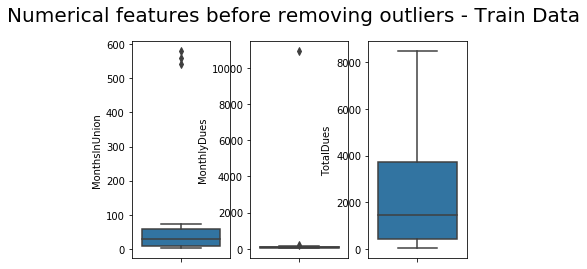

In [13]:
f, axes = plt.subplots(1, 3)
sns.set_context({"figure.figsize": (5, 5)})
sns.boxplot(y = "MonthsInUnion", data = train_data , ax = axes[0])
sns.boxplot(y = "MonthlyDues", data = train_data, ax = axes[1])
sns.boxplot(y = "TotalDues", data = train_data , ax = axes[2])
plt.suptitle("Numerical features before removing outliers - Train Data", y = 1, fontsize = 20)

#### Extract the numerical variables ('MonthsInUnion', 'MonthlyDues', 'TotalDues') form train DataFrame.

In [14]:
train_numerical= train_data.loc[: ,('MonthsInUnion','MonthlyDues','TotalDues')]

#### Calculate IQR of the numerical variables as identified above to detect the outlier.

In [15]:
Q1  = train_numerical.quantile(0.25)
Q3  = train_numerical.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MonthsInUnion      48.00
MonthlyDues        51.00
TotalDues        3284.75
dtype: float64


#### Remove outlier values from the numerical variables in train DataFrame.

In [16]:
train_data= train_data[~((train_data < (Q1 - 1.5 * IQR)) |(train_data > (Q3 + 1.5 * IQR))).any(axis = 1)]
train_data.shape

(995, 21)

#### Identify and drop the "ID" column from the test and toPredict dataFrames for analysis as this does not add any analytical value.

In [17]:
# assign the ID columns to a varaible later to be used to build the prediction DataFrame
test_ID = toPredict_data.loc[:,'DS_ID']
train_ID = train_data.loc[:,'DS_ID']

# drop the test id for analysis
toPredict_data = toPredict_data.drop(['DS_ID'],axis=1)
train_data = train_data.drop(['DS_ID'],axis=1)

print(train_data.shape)
print(toPredict_data.shape)

(995, 20)
(4992, 19)


#### Check the distribution of numerical variables after removing the outlier from train DataFrame.

Text(0.5, 1, 'Numerical features after removing outliers - Train Data')

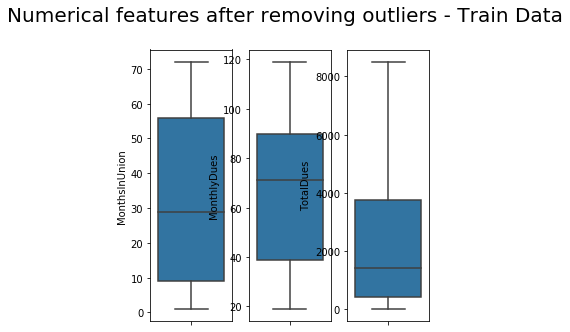

In [18]:
f, axes = plt.subplots(1, 3)
sns.set_context({"figure.figsize": (5, 5)})
sns.boxplot(y = "MonthsInUnion", data = train_data , ax = axes[0])
sns.boxplot(y = "MonthlyDues", data = train_data, ax = axes[1])
sns.boxplot(y = "TotalDues", data = train_data , ax = axes[2])
plt.suptitle("Numerical features after removing outliers - Train Data", y = 1, fontsize = 20)

## Part E: Plot the data:

#### Identify the columns in train DataFrame.

In [19]:
train_data.columns

Index(['gender', 'Management', 'USAcitizen', 'Married', 'MonthsInUnion',
       'ContinuingEd', 'FeatureA', 'Connectivity', 'FeatureC', 'FeatureD',
       'FeatureE', 'FeatureF', 'FeatureG', 'FeatureB', 'DuesFrequency',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyDues', 'TotalDues',
       'LeftUnion'],
      dtype='object')

#### Display the distribution of numerical variables separated by the label "LeftUnion" using violin plot.

Text(0.5, 1, 'Violin plot of numeric variables vs LeftUnion')

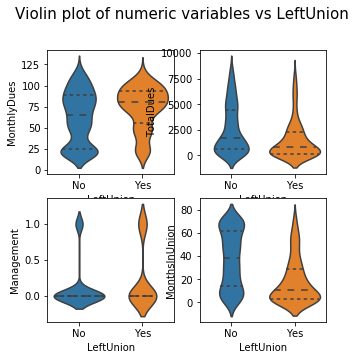

In [20]:
# violin plot of train data features
f, axes = plt.subplots(2, 2)
sns.violinplot(  y = "MonthlyDues", x = "LeftUnion", data = train_data,  orient = 'v' , ax=axes[0,0], inner = "quartile")
sns.violinplot(  y = "TotalDues", x = "LeftUnion", data = train_data,  orient = 'v' , ax=axes[0,1], inner = "quartile")
sns.violinplot(  y = "Management", x = "LeftUnion", data = train_data,  orient = 'v' , ax=axes[1, 0], inner = "quartile")
sns.violinplot(  y = "MonthsInUnion", x = "LeftUnion", data = train_data,  orient = 'v' , ax=axes[1, 1], inner = "quartile")

plt.suptitle("Violin plot of numeric variables vs LeftUnion", y = 1, fontsize=15)

#### Plot the categorical variables separated by the label "LeftUnion" using bar plot.

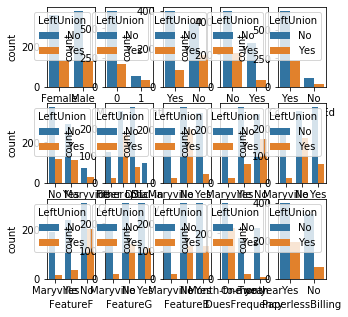

In [21]:
# Bar plot for categorical variables
f, axes = plt.subplots(3, 5)
sns.set_context({"figure.figsize": (10, 20)})
sns.countplot(x = 'gender', hue = 'LeftUnion', data = train_data, ax = axes[0,0])
sns.countplot(x = 'Management', hue = 'LeftUnion', data = train_data, ax = axes[0,1])
sns.countplot(x = 'USAcitizen', hue = 'LeftUnion', data = train_data, ax = axes[0,2])
sns.countplot(x = 'Married', hue = 'LeftUnion', data = train_data, ax = axes[0,3])
sns.countplot(x = 'ContinuingEd', hue = 'LeftUnion', data = train_data, ax = axes[0,4])
sns.countplot(x = 'FeatureA', hue = 'LeftUnion', data = train_data, ax = axes[1,0])
sns.countplot(x = 'Connectivity', hue = 'LeftUnion', data = train_data, ax = axes[1,1])
sns.countplot(x = 'FeatureC', hue = 'LeftUnion', data = train_data, ax = axes[1,2])
sns.countplot(x = 'FeatureD', hue = 'LeftUnion', data = train_data, ax = axes[1,3])
sns.countplot(x = 'FeatureE', hue = 'LeftUnion', data = train_data, ax = axes[1,4])
sns.countplot(x = 'FeatureF', hue = 'LeftUnion', data = train_data, ax = axes[2,0])
sns.countplot(x = 'FeatureG', hue = 'LeftUnion', data = train_data, ax = axes[2,1])
sns.countplot(x = 'FeatureB', hue = 'LeftUnion', data = train_data, ax = axes[2,2])
sns.countplot(x = 'DuesFrequency', hue = 'LeftUnion', data = train_data, ax = axes[2,3])
sns.countplot(x = 'PaperlessBilling', hue = 'LeftUnion', data = train_data, ax = axes[2,4])

plt.show()

#### Check if there is any relation between MonthlyDues and MonthsInUnion by gender in terms of label "LeftUnion".

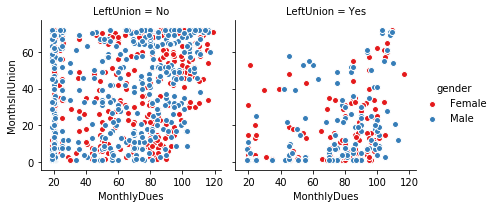

In [22]:
g = sns.FacetGrid(train_data, col="LeftUnion",  hue ="gender", palette="Set1")
g = (g.map(plt.scatter, "MonthlyDues", "MonthsInUnion", edgecolor="w").add_legend())

#### Display the numerical variables with pair plots to check if there is any correlation as seen visually.

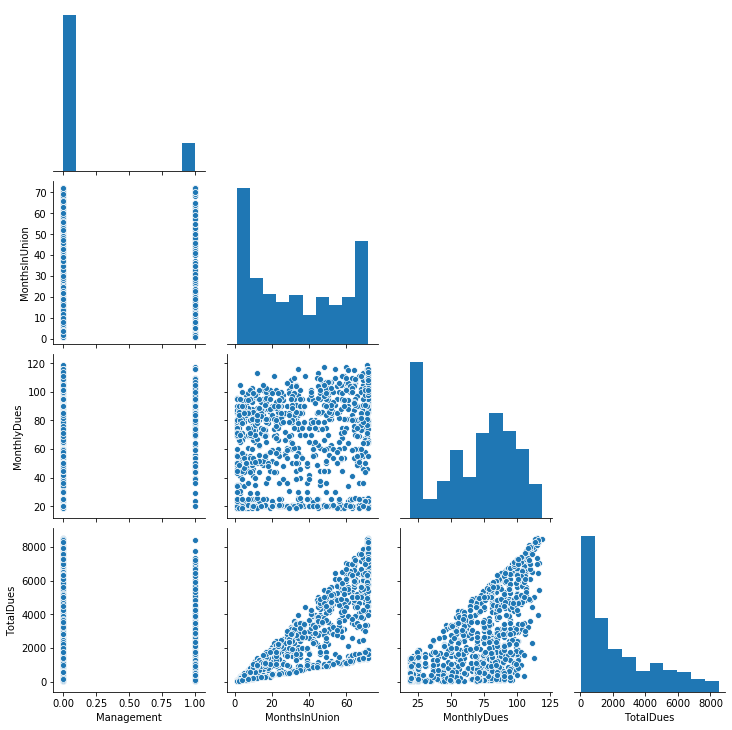

In [23]:
sns.pairplot(train_data, corner = True)

## Part F: Data Standardization / Normalization:
#### Standardize/normalize the variables as needed for the proper fitting of the models.

#### List all of the columns in train DataFrame.

In [24]:
train_data.columns

Index(['gender', 'Management', 'USAcitizen', 'Married', 'MonthsInUnion',
       'ContinuingEd', 'FeatureA', 'Connectivity', 'FeatureC', 'FeatureD',
       'FeatureE', 'FeatureF', 'FeatureG', 'FeatureB', 'DuesFrequency',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyDues', 'TotalDues',
       'LeftUnion'],
      dtype='object')

#### 'MonthsInUnion', 'MonthlyDues', 'TotalDues' are numerical feature variables, 'LeftUnion' is label and rest are categorical features variables.
#### Separate the categorical, numerical feature variables and label variable in the train DataFrame.  

In [25]:
# Segregate categorical and numerical variables
train_data_num = train_data.loc[:,['MonthsInUnion','MonthlyDues','TotalDues']].values

train_data_cat = train_data.loc[:,['gender','Management','USAcitizen', 'Married', 'ContinuingEd', 'FeatureA', 
                                 'Connectivity', 'FeatureC','FeatureD', 'FeatureE','FeatureF', 
                                 'FeatureG', 'FeatureB', 'DuesFrequency', 'PaperlessBilling', 
                                   'PaymentMethod']].values

y_train = train_data.LeftUnion.values #label variable of train DataFrame

print('Numerical Feature Shape:  ', train_data_num.shape)
print('Categorical Feature Shape:',train_data_cat.shape)
print('Label Shape:              ', y_train.shape)

Numerical Feature Shape:   (995, 3)
Categorical Feature Shape: (995, 16)
Label Shape:               (995,)


#### Separate the categorical, numerical feature variables and label variable in the toPredict DataFrame.  

In [26]:
# Segregate categorical and numerical data
toPredict_data_num = toPredict_data.loc[:,['MonthsInUnion','MonthlyDues','TotalDues']].values

toPredict_data_cat = toPredict_data.loc[:,['gender','Management','USAcitizen', 'Married', 'ContinuingEd', 'FeatureA', 
                                 'Connectivity', 'FeatureC','FeatureD', 'FeatureE','FeatureF', 
                                 'FeatureG', 'FeatureB', 'DuesFrequency', 'PaperlessBilling', 
                                           'PaymentMethod']].values

print('Numerical Feature Shape:  ', toPredict_data_num.shape)
print('Categorical Feature Shape:',toPredict_data_cat.shape)

Numerical Feature Shape:   (4992, 3)
Categorical Feature Shape: (4992, 16)


#### Encode the categorical variables in train DataFrame by OneHotEncoder( ) function.

In [27]:
encoder = OneHotEncoder(sparse = False)
encoder.fit(train_data_cat)
train_data_enc = encoder.transform(train_data_cat)

print('Encoded Feature Array Shape:', train_data_enc.shape)

Encoded Feature Array Shape: (995, 44)


#### Encode the categorical variables in toPredict DataFrame by OneHotEncoder( ) function.

In [28]:
encoder = OneHotEncoder(sparse = False)
encoder.fit(toPredict_data_cat)
toPredict_data_enc = encoder.transform(toPredict_data_cat)

print('Encoded Feature Array Shape:', toPredict_data_enc.shape)

Encoded Feature Array Shape: (4992, 44)


#### Normalize the numerical variables in test and toPredict DataFrame.

In [29]:
scaler = StandardScaler()
train_data_num = scaler.fit_transform(train_data_num)
toPredict_data_num = scaler.fit_transform(toPredict_data_num)

print("Standarized train Feature Array Shape: " + str(train_data_num.shape))
print("Standarized test Feature Array Shape: " + str(toPredict_data_num.shape))

Standarized train Feature Array Shape: (995, 3)
Standarized test Feature Array Shape: (4992, 3)


#### Combine the encoded categorical variablesand normalized numerical variables in train and toPredict DataFrame.

In [30]:
norm_train_data = np.hstack([train_data_num, train_data_enc])
print("Train data Feature Array Shape: " + str(norm_train_data.shape))

norm_toPredict_data = np.hstack([toPredict_data_num, toPredict_data_enc])
print("test data Feature Array Shape: " + str(norm_toPredict_data.shape))

Train data Feature Array Shape: (995, 47)
test data Feature Array Shape: (4992, 47)


## Part G: PCA Analysis:
#### Conduct the PCA analysis to identify/consolidate the variables of importance to reduce the model complexity while maintaining the model prediction power.

#### Find out the optimal number of principal components by first setting the number of principal components too high (let's say PCA needed to explain 95% of variance in label variable) and then work backward to find optimal number of PCA.

In [31]:
pca = PCA(0.95) # explains 95% of variances
principalComp_train_data_T = pca.fit_transform(norm_train_data)
principalComp_train_data_Df_T = pd.DataFrame(principalComp_train_data_T) # create pandas DataFrame 

#### Check the number of components (DataFrame column) that are required to achieve the result.

In [32]:
print(principalComp_train_data_T.shape)

(995, 18)


### PCA Scree Plot
#### Plot Eigenvalue Vs Principal component to finding out what % of the variance is explained by the Principal components. We will find the optimal number of PCA based on the slope of the plot.

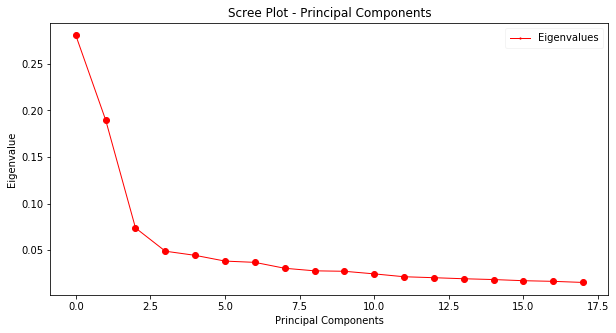

In [33]:
fig = plt.figure(figsize=(10,5))
plt.plot(principalComp_train_data_Df_T.columns, pca.explained_variance_ratio_, 'ro-', linewidth = 1)
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalue') 
plt.title('Scree Plot - Principal Components')
leg = plt.legend(['Eigenvalues'], loc = 'best', borderpad = 0.5, shadow = False, markerscale = 0.2)
leg.get_frame().set_alpha(0.2)
plt.show()

#### Looking at the scree plot, the Eigenvalue does not drop much beyond the principal component value of 10. Hence, we will select 10 as the optimal number of principal components of for the data transformation. Then we will create DataFrames where the feature variables are replaced with 10 principal components as determined above.

In [34]:
pca = PCA(n_components = 10) # as selected from scree plot
principalComp_train_data = pca.fit_transform(norm_train_data)
principalComp_toPredict_data = pca.fit_transform(norm_toPredict_data)

#### Convert the DataFrames to the pandas DataFrames for further analysis.

In [35]:
principalComp_train_data_Df = pd.DataFrame(principalComp_train_data) 
principalComp_toPredict_data_Df = pd.DataFrame(principalComp_toPredict_data)

#### Calculate the % of variation explained by the 10 principal components.

In [36]:
print('Explained variation for each principal component are:'+ '\n'+ str(pca.explained_variance_ratio_))  

print('Explained variation all principal components is: ' + str(round(pca.explained_variance_ratio_.sum(), 4)))

Explained variation for each principal component are:
[0.28289672 0.18900881 0.06979871 0.04741601 0.04270473 0.03935866
 0.03523526 0.03092199 0.02658453 0.0262455 ]
Explained variation all principal components is: 0.7902


## Part H: Build Logistic Regression Model:
#### Build logistic regression model using both normalized data and normalized PCA data.

## Logistic regression with Normalized (non PCA data)
#### Build logistic regression model with normalized non PCA data.

#### Randomly split the normalized training data to 75:25 train and validation data. Training data will be used to train the model and validation data will be used as out of sample data to validate the model performance.

In [37]:
# randomly split the train data to train and validation by 75:25 ratio
X1_train, X1_valid, y1_train, y1_valid = train_test_split(norm_train_data, y_train, test_size=0.25, 
                                                          random_state = 1, stratify = y_train)

print("Training data Features Shape:     "+str(X1_train.shape) + str(y1_train.shape))
print("Validation data Features Shape:   "+str(X1_valid.shape) + str(y1_valid.shape))

Training data Features Shape:     (746, 47)(746,)
Validation data Features Shape:   (249, 47)(249,)


#### Build the logistic regression model and calculate the training and validation accuracy of the model.

In [38]:
log_reg_mod = LogisticRegression(solver='lbfgs', penalty = 'none', max_iter = 2000)
log_reg_mod.fit(X1_train, y1_train)

# predict the label using X1 validation data
log_reg_mod.predict(X1_valid)

# calculate the training and validaton accuracy of model
log_reg_TrainingAccuracy_nonPCA = round(log_reg_mod.score(X1_train, y1_train), 4)
log_reg_ValidationAccuracy_nonPCA = round(log_reg_mod.score(X1_valid, y1_valid), 4)

print('Training Accuracy:  ', log_reg_TrainingAccuracy_nonPCA)
print('Validation Accuracy:', log_reg_ValidationAccuracy_nonPCA)

Training Accuracy:   0.8123
Validation Accuracy: 0.8153


#### Use the logistic regression model to predict the label values of toPredict data.

In [39]:
test_pred_log_reg_mod = log_reg_mod.predict(norm_toPredict_data)

# Create output of the predicted 
log_reg_mod_predict = pd.DataFrame(test_ID)
log_reg_mod_predict['log_reg_pred'] = test_pred_log_reg_mod # concatinate the predicted value with test ID
log_reg_mod_predict.head()

,DS_ID,log_reg_pred
0,10000,Yes
1,10001,No
2,10002,No
3,10003,No
4,10004,Yes


## Logistic regression (Normalized - PCA data)
#### Build logistic regression model using normalized PCA data. This model can be used to compare the similar model with non-PCA data.

#### Randomly split the normalized PCA training data to 75:25 train and validation data. Training data will be used to train the model and validation data will be used as out of sample data to validate the model performance.

In [40]:
X2_train, X2_valid, y2_train, y2_valid = train_test_split(principalComp_train_data_Df, y_train, test_size=0.25, 
                                                          random_state = 1, stratify = y_train)

print("Training data Features Shape:     "+str(X2_train.shape) + str(y2_train.shape))
print("Validation data Features Shape:   "+str(X2_valid.shape) + str(y2_valid.shape))

Training data Features Shape:     (746, 10)(746,)
Validation data Features Shape:   (249, 10)(249,)


#### Build the logistic regression model and calculate the training and validation accuracy of the model.

In [41]:
log_reg_mod_pca = LogisticRegression(solver='lbfgs', penalty='none', max_iter = 2000)
log_reg_mod_pca.fit(X2_train, y2_train)

# predict the label using X2 validation data
log_reg_mod_pca.predict(X2_valid)

log_reg_TrainingAccuracy = round(log_reg_mod_pca.score(X2_train, y2_train),4)
log_reg_ValidationAccuracy = round(log_reg_mod_pca.score(X2_valid, y2_valid),4)

# calculate the training and validaton accuracy of model
print('Training Accuracy:  ', log_reg_TrainingAccuracy)
print('Validation Accuracy:', log_reg_ValidationAccuracy)

Training Accuracy:   0.8056
Validation Accuracy: 0.8193


#### Use this logistic regression model to predict the label values of toPredict data.

In [42]:
test_log_reg_mod_pca = log_reg_mod_pca.predict(principalComp_toPredict_data_Df)

# Create output of the predicted 
log_reg_mod_pca_predict = pd.DataFrame(test_ID)
log_reg_mod_pca_predict['log_reg_pca_pred'] = test_log_reg_mod_pca
log_reg_mod_pca_predict.head()

,DS_ID,log_reg_pca_pred
0,10000,No
1,10001,No
2,10002,No
3,10003,No
4,10004,Yes


#### Even though the prediction accuracy of model using PCA and without PCA is not much different, for this project I will use the PCA data for further analysis as it will make the model less complex.


## Part I: Build the Decision tree:
#### Build the Decision tree using normalized PCA data. Use the train and validation data created above using the normalized and PCA data to build and validate the model. 

#### Build the decision tree model and hypertune it to find the max depth for optimal performance.

In [43]:
# Decision tree hypertuning
dt_train_acc = []
dt_valid_acc = []
depth_range = range(2, 35)

for i in depth_range:
    temp_tree = DecisionTreeClassifier(max_depth = i, random_state = 1)
    temp_tree.fit(X2_train, y2_train)
    dt_train_acc.append(temp_tree.score(X2_train, y2_train))
    dt_valid_acc.append(temp_tree.score(X2_valid, y2_valid))

dt_idx = np.argmax(dt_valid_acc)
dt_opt_depth = depth_range[dt_idx]

print('Optimal value for max_depth:          ', dt_opt_depth)


Optimal value for max_depth:           2


#### Visually display the training and validation accuracy Vs maximum depth of tree. Line plot below confirms the max depth of the model is 2 as calculated above.

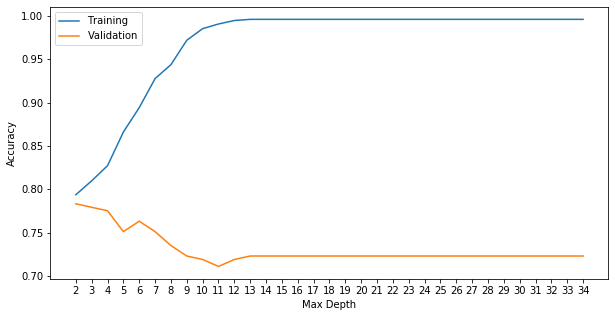

In [44]:
# plot the training and validation accuracy as a function of max_depth
plt.figure(figsize=([10, 5]))

plt.plot(depth_range, dt_train_acc, label = 'Training')
plt.plot(depth_range, dt_valid_acc, label = 'Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depth_range)
plt.legend()

plt.show()

#### Optimal decision tree model

In [45]:
dt_model = DecisionTreeClassifier(max_depth = dt_opt_depth, random_state = 1)
dt_model.fit(X2_train, y2_train)

dt_TrainingAccuracy = round(dt_model.score(X2_train, y2_train),4)
dt_ValidationAccuracy = round(dt_model.score(X2_valid, y2_valid),4)

print('Training Accuracy for Optimal Model:  ', dt_TrainingAccuracy)
print('Validation Accuracy for Optimal Model:', dt_ValidationAccuracy)

Training Accuracy for Optimal Model:   0.7936
Validation Accuracy for Optimal Model: 0.7831


#### Predict the label / target variable from toPredict DataFrame.

In [46]:
test_pred_dt_pca = dt_model.predict(principalComp_toPredict_data_Df)

# Create output of the predicted 
predict_dt_mod_pca = pd.DataFrame(test_ID)
predict_dt_mod_pca['rf_pca_pred'] = test_pred_dt_pca
predict_dt_mod_pca.head()

,DS_ID,rf_pca_pred
0,10000,No
1,10001,No
2,10002,No
3,10003,No
4,10004,Yes


## Part J: Build the Random forest model:
#### Build the random forest model using normalized PCA data. Use the train and validation data created above using the normalized and PCA data to build and validate the model. 

#### Building the decision tree model and hypertune it to find the optimal depth.

In [47]:
# Random forest hypertuning
rf_train_acc = []
rf_valid_acc = []

depth_range = range(2, 35)
for i in depth_range:
    temp_forest = RandomForestClassifier(n_estimators = 100, max_depth= i, random_state = 1)
    temp_forest.fit(X2_train, y2_train)
    rf_train_acc.append(temp_forest.score(X2_train, y2_train))
    rf_valid_acc.append(temp_forest.score(X2_valid, y2_valid))

rf_idx = np.argmax(rf_valid_acc)
rf_opt_depth = depth_range[rf_idx]

print('Optimal value for max_depth:          ', rf_opt_depth)

Optimal value for max_depth:           6


#### Visually display the training and validation accuracy Vs maximum depth of tree. Line plot below confirms the max depth of the model is 6 as calculated above.

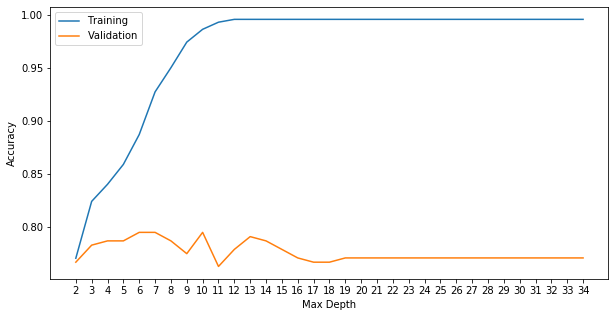

In [48]:
# plot the training and validation accuracy as a function of max_depth
plt.figure(figsize=([10, 5]))

plt.plot(depth_range, rf_train_acc, label='Training')
plt.plot(depth_range, rf_valid_acc, label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depth_range)
plt.legend()

plt.show()

#### Optimal random forest model

In [49]:
rf_model = RandomForestClassifier(n_estimators= 100, max_depth= rf_opt_depth, random_state = 1)
rf_model.fit(X2_train, y2_train)

rf_TrainingAccuracy = round(rf_model.score(X2_train, y2_train),4)
rf_ValidationAccuracy = round(rf_model.score(X2_valid, y2_valid),4)

print('Training Accuracy for Optimal Model:  ', rf_TrainingAccuracy)
print('Validation Accuracy for Optimal Model:', rf_ValidationAccuracy)

Training Accuracy for Optimal Model:   0.8874
Validation Accuracy for Optimal Model: 0.7952


#### Predict the label / target variable from toPredict DataFrame.

In [50]:
# predict the label variable
test_pred_rf_pca = rf_model.predict(principalComp_toPredict_data_Df)

# Create output of the predicted values 
predict_rf_mod_pca = pd.DataFrame(test_ID)
predict_rf_mod_pca['rf_pca_pred'] = test_pred_rf_pca # concatenate the test ID
predict_rf_mod_pca.head()

,DS_ID,rf_pca_pred
0,10000,Yes
1,10001,No
2,10002,No
3,10003,No
4,10004,Yes


## Park K: Build Support Vector Machine (SVM):
#### Build the Support Vector Machine using normalized PCA data. Use the train and validation data created above using the normalized and PCA data to build and validate the model. 


In [51]:
svm_model = SVC()
svm_model.fit(X2_train,y2_train)

svm_TrainingAccuracy = round(svm_model.score(X2_train, y2_train),4)
svm_ValidationAccuracy = round(svm_model.score(X2_valid, y2_valid),4)

print('Training Accuracy:  ', svm_TrainingAccuracy)
print('Validation Accuracy:', svm_ValidationAccuracy)

Training Accuracy:   0.8298
Validation Accuracy: 0.8153


In [52]:
# predict the values
svm_test_pred_pca_predict = svm_model.predict(principalComp_toPredict_data_Df)
svm_test_pred_pca_predict1 = svm_model.predict(X2_valid)

In [53]:
print(classification_report(y2_valid, svm_test_pred_pca_predict1))

              precision    recall  f1-score   support

          No       0.85      0.92      0.88       185
         Yes       0.69      0.52      0.59        64

    accuracy                           0.82       249
   macro avg       0.77      0.72      0.74       249
weighted avg       0.81      0.82      0.81       249



#### Predict the label / target variable from toPredict DataFrame.

In [54]:
Predict_svm_pca = pd.DataFrame(test_ID)
Predict_svm_pca['svm_pca_pred'] = svm_test_pred_pca_predict
Predict_svm_pca.head()

,DS_ID,svm_pca_pred
0,10000,Yes
1,10001,No
2,10002,Yes
3,10003,No
4,10004,Yes


## Part L: Build Neural networks:
#### Build the Neural network using normalized PCA data. Use the train and validation data created above using the normalized and PCA data to build and validate the model. 

In [55]:
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), 
                           max_iter=1500, activation = 'relu', solver='lbfgs',random_state=1)

nnc = classifier.fit(X2_train, y2_train)

In [56]:
nn_valid_pred_pca=nnc.predict(X2_valid)
nn_ValidationAccuracy = round(np.mean(nn_valid_pred_pca==y2_valid),4)
print(nn_ValidationAccuracy)

0.751


#### Predict the label / target variable from toPredict DataFrame.

In [57]:
# Predict values
nn_test_pred_pca=nnc.predict(principalComp_toPredict_data_Df)

predict_nn_pca = pd.DataFrame(test_ID)
predict_nn_pca['nn_pca_pred'] = nn_test_pred_pca
predict_nn_pca.head()

,DS_ID,nn_pca_pred
0,10000,Yes
1,10001,No
2,10002,Yes
3,10003,Yes
4,10004,No


## Part M: Identify the best predictive model and predict the label:
#### Compile the model performance, choose the best model. Make the prediction using the best model.

In [58]:
df = {'Model_Type': ["Logistic Regression", "Decision Tree", "Random Forest", "Support Vector Machine","Neural Network"],
'Validation_Accuracy': [log_reg_ValidationAccuracy, dt_ValidationAccuracy, rf_ValidationAccuracy, svm_ValidationAccuracy, nn_ValidationAccuracy]}
df1 = pd.DataFrame(df)
df1

,Model_Type,Validation_Accuracy
0,Logistic Regression,0.8193
1,Decision Tree,0.7831
2,Random Forest,0.7952
3,Support Vector Machine,0.8153
4,Neural Network,0.7510


#### As both SVM and logistic regression had the highest validation score, we can select either one of them as the best model for prediction. For this project I will choose logistic regression as the best model to predict and use it to predict the label value based on member information as captured in the toPredict DataFrame.

In [59]:
# predict the label / independent variable of test data
test_log_reg_mod_pca = log_reg_mod_pca.predict(principalComp_toPredict_data_Df)

# Create output of the predicted 
log_reg_mod_pca_predict = pd.DataFrame(test_ID)
log_reg_mod_pca_predict['Prediction_LeftUnion'] = test_log_reg_mod_pca
log_reg_mod_pca_predict.head(10)

,DS_ID,Prediction_LeftUnion
0,10000,No
1,10001,No
2,10002,No
3,10003,No
4,10004,Yes
5,10005,Yes
6,10006,No
7,10007,No
8,10008,No
9,10009,No


#### Save the prediction to local drive for further calculation or future reference.

In [60]:
# Save the prediction to csv
log_reg_mod_pca_predict.to_csv("LeftUnion_Prediction.csv")